In [169]:
# Part 1: Data Preparation and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [170]:
# Load data
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'])

In [171]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [173]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


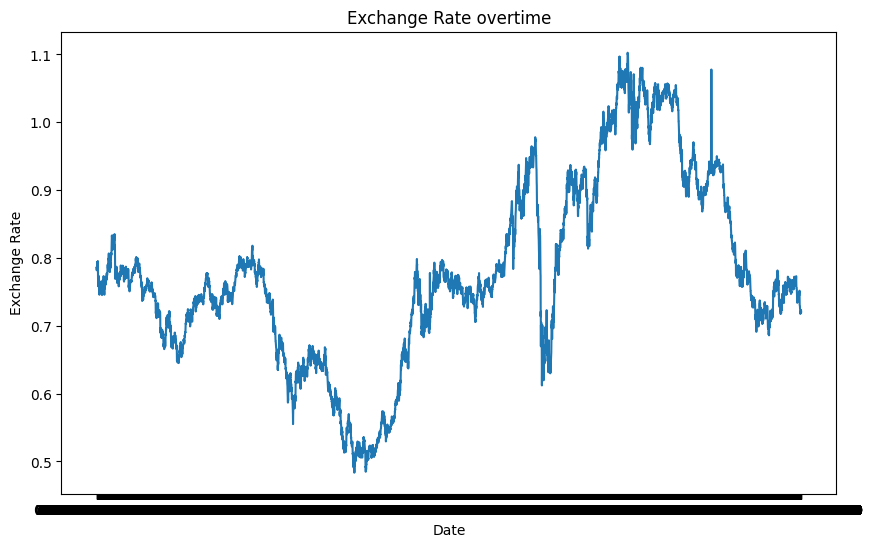

In [174]:
# Initial Exploration
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['Ex_rate'])
plt.title('Exchange Rate overtime')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [175]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

In [176]:
# Part 2: Model Building - ARIMA
# Parameter Selection for ARIMA

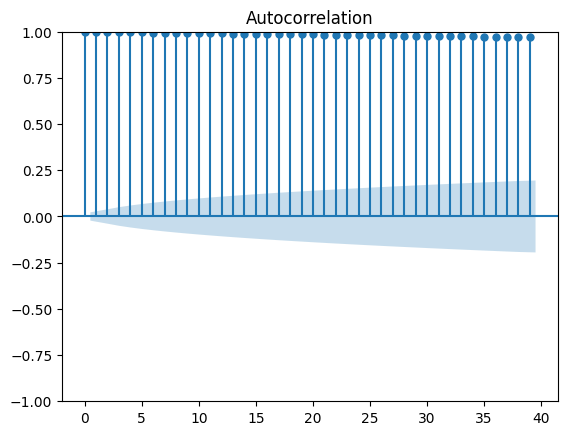

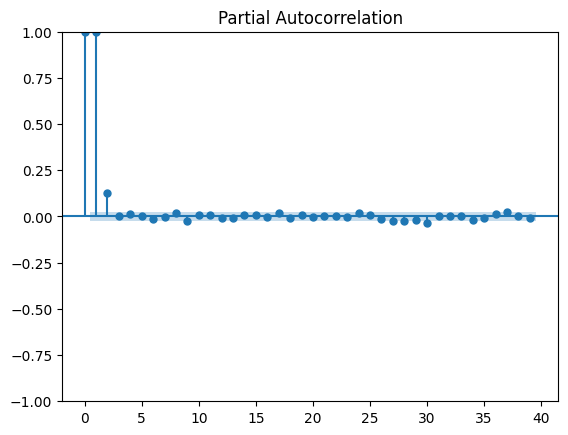

In [177]:
plot_acf(data['Ex_rate'])
plot_pacf(data['Ex_rate'])
plt.show()

In [178]:
# Model Fitting, Assume p=1, d=1, q=1 based on plots
model_arima = ARIMA(data['Ex_rate'], order=(1,1,1))
model_arima_fit = model_arima.fit()

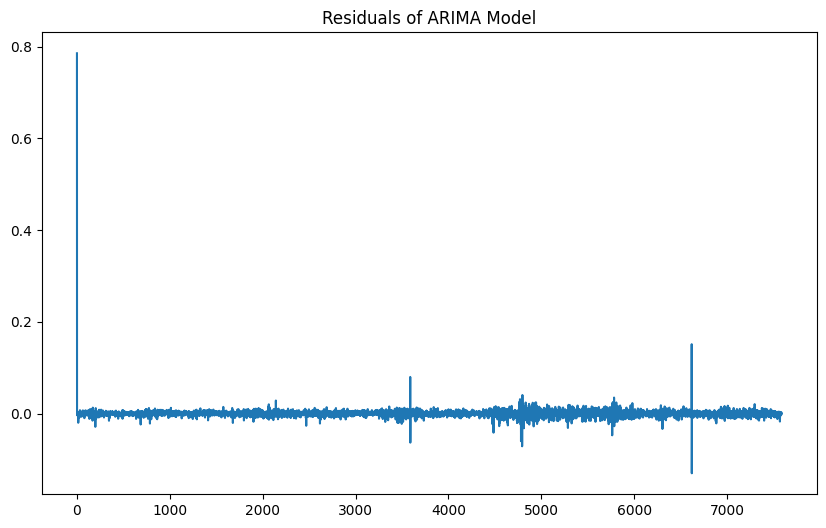

In [179]:
# Diagnostics: Plot residuals
residuals_arima = model_arima_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals_arima)
plt.title('Residuals of ARIMA Model')
plt.show()

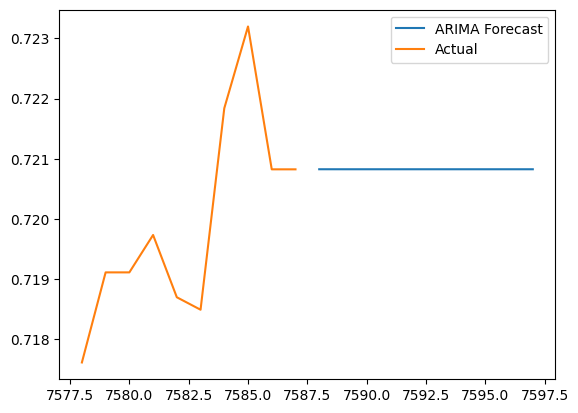

In [180]:
# Forecasting with ARIMA
forecast_arima = model_arima_fit.forecast(steps=10)
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(data['Ex_rate'].iloc[-10:], label='Actual')
plt.legend()
plt.show()

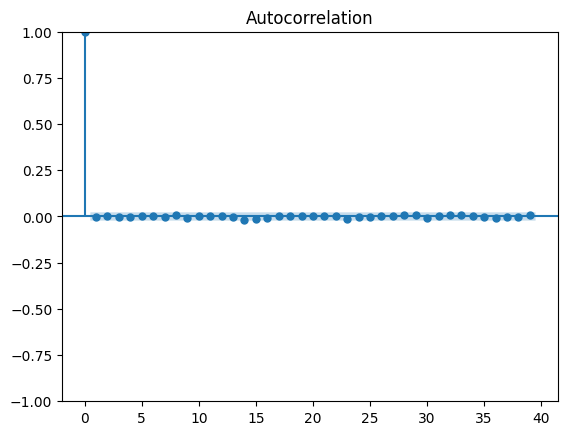

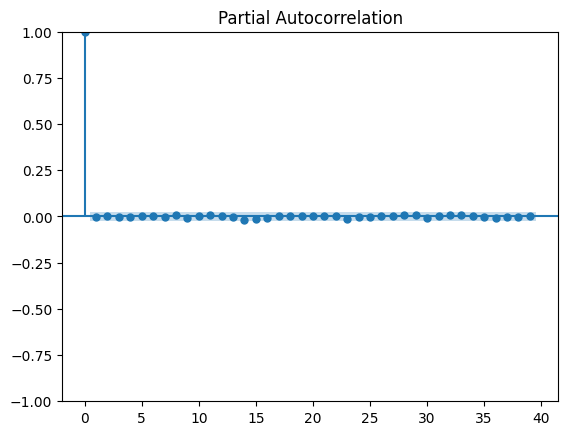

In [181]:
# Diagnostics
residuals = model_arima_fit.resid
plot_acf(residuals)
plot_pacf(residuals)
plt.show()

In [189]:
# Part 3: Model Building - Exponential Smoothing
# Model Selection and Parameter Optimization

model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_exp_smoothing_fit = model.fit(optimized=True)


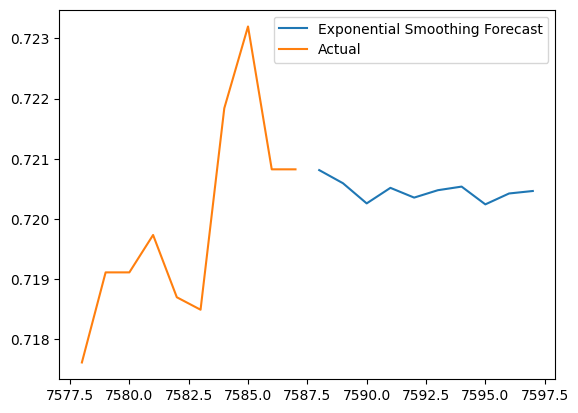

In [183]:
# Forecasting with Exponential Smoothing
forecast_exp_smoothing = model_exp_smoothing_fit.forecast(steps=10)
plt.plot(forecast_exp_smoothing, label='Exponential Smoothing Forecast')
plt.plot(data['Ex_rate'].iloc[-10:], label='Actual')
plt.legend()
plt.show()

In [184]:
# Part 4: Evaluation and Comparison
# Compute Error Metrics
mae_arima = mean_absolute_error(data['Ex_rate'].iloc[-10:], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(data['Ex_rate'].iloc[-10:], forecast_arima))
mape_arima = mean_absolute_percentage_error(data['Ex_rate'].iloc[-10:], forecast_arima)


In [185]:
mae_es = mean_absolute_error(data['Ex_rate'].iloc[-10:], forecast_exp_smoothing)
rmse_es = np.sqrt(mean_squared_error(data['Ex_rate'].iloc[-10:], forecast_exp_smoothing))
mape_es = mean_absolute_percentage_error(data['Ex_rate'].iloc[-10:], forecast_exp_smoothing)


In [186]:
print('ARIMA Error Metrics:')
print('MAE:', mae_arima)
print('RMSE:', rmse_arima)
print('MAPE:', mape_arima)


ARIMA Error Metrics:
MAE: 0.001556771200434226
RMSE: 0.0018425706107113402
MAPE: 0.0021637013039425557


In [187]:
print('Exponential Smoothing Error Metrics:')
print('MAE:', mae_es)
print('RMSE:', rmse_es)
print('MAPE:', mape_es)


Exponential Smoothing Error Metrics:
MAE: 0.0015256811769979507
RMSE: 0.0017804899751141638
MAPE: 0.002119561937690052


In [188]:
# comparing both the methods
if rmse_arima < rmse_es:
    print("ARIMA is better")
else:
    print("Exponential Smoothing is better")

Exponential Smoothing is better
